In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("full_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.shape

(4981, 11)

In [4]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

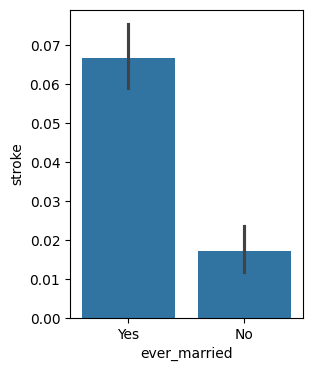

In [5]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="ever_married",y="stroke",data = df,ax=ax)
plt.show()

In [6]:
df['ever_married']=[0 if i!='Yes' else 1 for i in df['ever_married']]

In [7]:
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['gender'].unique())

[1 0]
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female']


In [8]:
df = pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status','gender'])
df.head()
df = df*1

In [9]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Female                     0
gender_Male                       0
dtype: int64

In [10]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0,0,1
1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0,0,1
2,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1,1,0
3,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0,0,1


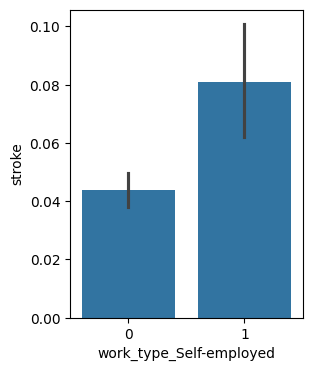

In [11]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Self-employed",y="stroke",data = df,ax=ax)
plt.show()

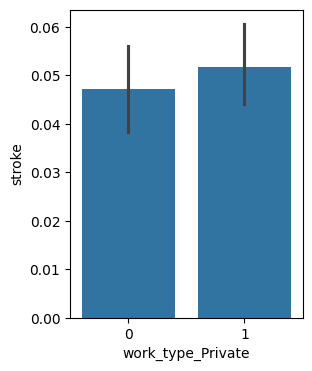

In [12]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Private",y="stroke",data = df,ax=ax)
plt.show()

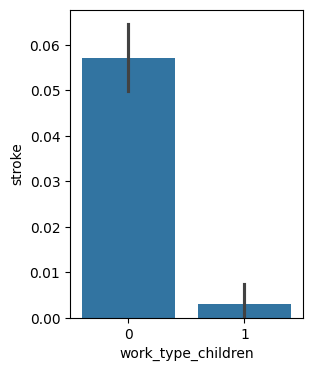

In [13]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_children",y="stroke",data = df,ax=ax)
plt.show()

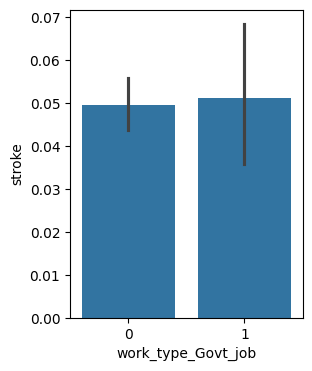

In [14]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Govt_job",y="stroke",data = df,ax=ax)
plt.show()

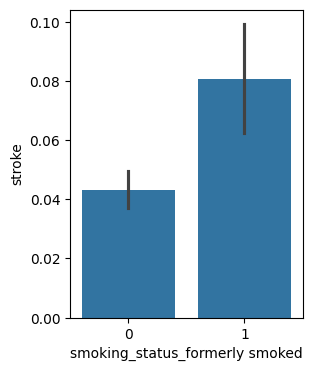

In [15]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_formerly smoked",y="stroke",data = df,ax=ax)
plt.show()

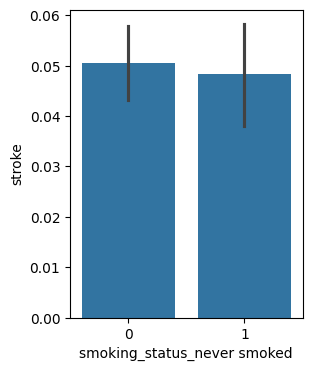

In [16]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_never smoked",y="stroke",data = df,ax=ax)
plt.show()

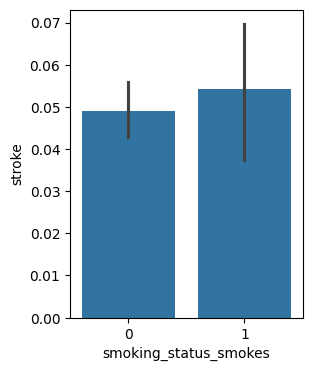

In [17]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_smokes",y="stroke",data = df,ax=ax)
plt.show()

In [18]:
df.corr()['stroke']


age                               0.246478
hypertension                      0.131965
heart_disease                     0.134610
ever_married                      0.108398
avg_glucose_level                 0.133227
bmi                               0.056926
stroke                            1.000000
work_type_Govt_job                0.002574
work_type_Private                 0.010459
work_type_Self-employed           0.062643
work_type_children               -0.085075
Residence_type_Rural             -0.016494
Residence_type_Urban              0.016494
smoking_status_Unknown           -0.055699
smoking_status_formerly smoked    0.065320
smoking_status_never smoked      -0.004806
smoking_status_smokes             0.008561
gender_Female                    -0.008870
gender_Male                       0.008870
Name: stroke, dtype: float64

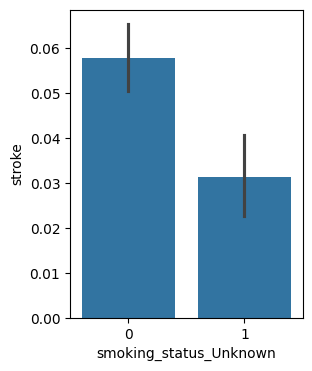

In [19]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_Unknown",y="stroke",data = df,ax=ax)
plt.show()

In [20]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [22]:
dt = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [23]:
confusion_matrix(y_pred,y_test)

array([[1420,   74],
       [   1,    0]], dtype=int64)

In [24]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [25]:
print(dt.tree_.threshold)

[ 55.5         37.5         70.44000244  70.35499954  57.94000053
  -2.          -2.          -2.          -2.          23.94999981
  -2.          48.85000038 171.77999878  -2.          -2.
   0.5         -2.          -2.          67.5          0.5
 110.97999954  56.5         -2.          -2.           0.5
  -2.          -2.          30.65000057  -2.         246.80500031
  -2.          -2.         126.84000015  82.11499786  42.75
  -2.          -2.          75.5         -2.          -2.
  22.15000057  -2.         238.80000305  -2.          -2.        ]


In [26]:
accuracy_score(y_test,y_pred)

0.9498327759197325

In [27]:
rf = RandomForestClassifier(criterion="entropy",max_depth=15,random_state=0)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [28]:
confusion_matrix(rf_pred,y_test)

array([[1420,   72],
       [   1,    2]], dtype=int64)

In [29]:
accuracy_score(y_test,rf_pred)

0.9511705685618729

In [30]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=2)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [31]:
confusion_matrix(lr_pred,y_test)

array([[1421,   74],
       [   0,    0]], dtype=int64)

In [32]:
accuracy_score(lr_pred,y_test)

0.9505016722408027